In [1]:
#import csv
#from collections import defaultdict, Counter
#from datetime import datetime
#from datetime import date
#import numpy as np
#import os
from pandas import pandas as pd
#import re
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [3]:
file = "harveyward.csv"
cols = (0,3,4,5,7,8,9,10,11,12,14,16)
df = pd.read_csv(file, usecols=cols)

checks = df['item type']=='CH'
checkdonors = df[checks]

cash = df['item type']=='CA'
cashdonors = df[cash]

ik = df['item type']=='IK'
ikdonors = df[ik]

loans = df['item type']=='LO'
loandonors = df[loans]

refunds = df['item type']=='RE'
refunddonors = df[refunds]


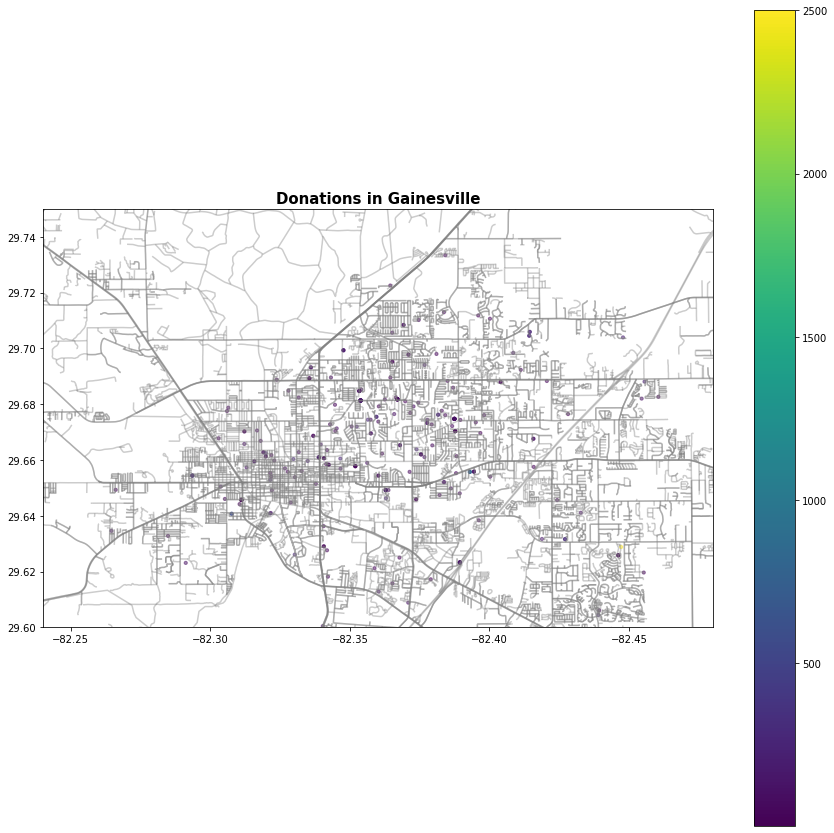

In [4]:
# Mapping the data from
# https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391

file = "combined_geocoded.csv"
cols = (0,3,4,5,7,8,9,10,11,12,14,16,17,18,19)
df = pd.read_csv(file, usecols=cols, encoding="ISO-8859-1")

gnv = df["city"]=="Gainesville"
gnvdonors = df[gnv]

# import street map
gnvmap = gpd.read_file('AlachuaCounty/tl_2017_12001_roads.shp')

# designate coordinate system
crs = {'init':'espc:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(gnvdonors['Longitude'], gnvdonors['Latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(gnvdonors,
                          crs = crs,
                          geometry = geometry)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))

# add .shp mapfile to axes
gnvmap.plot(ax=ax, alpha=0.4,color='grey')

# add geodataframe to axes
# assign ‘amount’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
geo_df.plot(column='amount',ax=ax,alpha=0.5, legend=True,markersize=10)

# add title to graph
plt.title('Donations in Gainesville', fontsize=15,fontweight='bold')

# set latitiude and longitude boundaries for map display
plt.xlim(-82.24,-82.48)
plt.ylim(29.6,29.75)

# show map
plt.show()
